In [3]:
import requests
import json
import time
from collections import defaultdict
import re

def fetch_full_text(article_id, title):
    response = requests.get(f"https://www.ncbi.nlm.nih.gov/research/bionlp/RESTful/pmcoa.cgi/BioC_json/{article_id}/unicode")

    summary = {
        'Abstract': [],
        'Method': []
    }

    if response.text == f'No record can be found for the input: pmc{article_id[3:]}':
        print(f"No record found for article {article_id} titled {title}.")

    else:
        try:
            # print(len(response.text[1:-1]))
            data = json.loads(response.text[1:-1])
            for text in data['documents'][0]['passages'][:]:
                if text['infons']['section_type'] == 'ABSTRACT':
                    summary['Abstract'].append(text['text'])
                if text['infons']['section_type'] == 'METHODS':
                    summary['Method'].append(text['text'])
        except json.JSONDecodeError as e:
            data = json.loads(response.text[e.colno+2:-1])
            for text in data['documents'][0]['passages'][:]:
                if text['infons']['section_type'] == 'ABSTRACT':
                    summary['Abstract'].append(text['text'])
                if text['infons']['section_type'] == 'METHODS':
                    summary['Method'].append(text['text'])
        
        summary['Abstract'] = "\n".join(summary['Abstract'])
        summary['Method'] = "\n".join(summary['Method'])
    return summary

In [4]:
article_info = defaultdict(str)

with open("valid.txt", 'r') as f1:
    with open('valid_articles.txt', 'r') as f2:
        for id, line in zip(f1, f2):
            article_info[id.strip()] = {'class': 1, "title": line.strip()}
        f2.close()
    f1.close()
with open("invalid.txt", 'r') as f1:
    with open('invalid_articles.txt', 'r') as f2:
        for id, line in zip(f1, f2):
            article_info[id.strip()] = {'class': 0, "title": line.strip()}
        f2.close()
    f1.close()

valid_ids = []
invalid_ids = []

with open('valid.txt', 'r') as f:
    valid_ids = [line.strip() for line in f]

with open('invalid.txt', 'r') as f:
    invalid_ids = [line.strip() for line in f]

for id in valid_ids:
    try:
        article_info[id]['summary'] = fetch_full_text(id, article_info[id]['title'])
    except TypeError:
        print(article_info[id])
    
for id in invalid_ids:
    if id == '---' :
        continue
    try:
        article_info[id]['summary'] = fetch_full_text(id, article_info[id]['title'])
    except TypeError:
        print(article_info[id])


In [5]:
cot_few_shot_examples = {
        "user_one": """
    {"Abstract": "Cerebrospinal fluid (CSF) neurofilament light (NfL) concentration has reproducibly been shown to reflect neurodegeneration in brain disorders, including Alzheimer’s disease (AD). NfL concentration in blood correlates with the corresponding CSF levels, but few studies have directly compared the reliability of these 2 markers in sporadic AD. Herein, we measured plasma and CSF concentrations of NfL in 478 cognitively unimpaired (CU) subjects, 227 patients with mild cognitive impairment, and 113 patients with AD dementia. We found that the concentration of NfL in CSF, but not in plasma, was increased in response to Aβ pathology in CU subjects. Both CSF and plasma NfL concentrations were increased in patients with mild cognitive impairment and AD dementia. Furthermore, only NfL in CSF was associated with reduced white matter microstructure in CU subjects. Finally, in a transgenic mouse model of AD, CSF NfL increased before serum NfL in response to the development of Aβ pathology. In conclusion, NfL in CSF may be a more reliable biomarker of neurodegeneration than NfL in blood in preclinical sporadic AD.
Highlights
CSF NfL is increased and associated with amyloid pathology in preclinical AD.
Plasma NfL is increased in symptomatic AD.
CSF NfL is associated with reduced white matter microstructure in preclinical AD.
Plasma NfL is associated with reduced white matter microstructure in symptomatic AD.
In 5xFAD mice, NfL in CSF is increased at an earlier time point than in serum.", "Method": "Materials and methods
BioFINDER study population
The study was approved by the Regional Ethics Committee in Lund, Sweden, and the participants or their relatives gave written informed consent.
 The study population originated from the prospective and longitudinal Swedish BioFINDER study and consisted of 298 cognitively healthy elderly participants, 407 patients with mild cognitive symptoms, and 113 patients with AD dementia from which baseline CSF and plasma NFL samples were available.
Cognitively healthy elderly participants were recruited from the longitudinal population-based Malmö Diet and Cancer Study between 2010 and 2014 according to the following inclusion criteria: ≥60 years of age, absence of cognitive symptoms as assessed by a physician, Mini-Mental State Examination score of 28–30 at screening visit, not fulfilling the criteria for MCI or any dementia, and fluency in Swedish. Exclusion criteria were significant neurological or psychiatric illness, significant alcohol or substance abuse, and refusing lumbar puncture or magnetic resonance imaging (MRI).
Patients with mild cognitive symptoms were consecutively enrolled from the Memory Clinic at Skåne University Hospital and Ängelholm Hospital in Sweden between 2010 and 2014. Included individuals had an age between 60 and 80 years, were referred to any of the 2 memory clinics due to cognitive symptoms, had an Mini-Mental State Examination score of 24–30 at baseline visit, did not fulfill the criteria for any dementia, and were fluent in Swedish. The exclusion criteria were cognitive impairment that with certainty could be explained by another condition or disease, significant alcohol or substance abuse, and refusing lumbar puncture or neuropsychological assessment. Following neuropsychological assessment including a test battery evaluating verbal ability, episodic memory function, visuospatial construction ability, and attention and executive functions, 180 patients were classified as subjective cognitive decline and 227 patients were classified as MCI. In accordance with the guidelines from the US National Institute on Aging-Alzheimer’s Association, cognitively healthy elderly participants and patients with subjective cognitive decline were included in the CU group.
Patients with AD dementia were included after thorough clinical assessment at the Memory Clinic at Skåne University Hospital in Sweden. All study participants met the criteria for probable AD dementia as defined by the National Institute of Neurological and Communicative Disorders and Stroke and the Alzheimer’s Disease and Related Disorders Association. Individuals with significant alcohol or substance abuse were excluded.
Study participants who were CU or diagnosed with MCI were categorized into groups with normal (A−) or pathologic (A+) CSF Aβ using the Aβ42/Aβ40 ratio with the cutoff <0.091. This cutoff was established using Gaussian mixture modeling. In addition, these individuals were further categorized based on normal (N−) and abnormal (N+) cortical thickness in AD-susceptible temporal regions as determined by MRI (see Section 2.3 below) with the cutoff <2.25. As cortical thickness was not bimodally distributed, Gaussian mixture modeling for cutoff determination could not be applied. Instead, the cutoff was defined as mean −1.5 standard deviation of A− CU cases, which has been commonly used in other studies. Participants with AD dementia were all A+, however, no information on cortical thickness was available for this group.
CSF and blood collection in the BioFINDER study population
Collection of lumbar CSF and blood samples from each study participant was performed on the same day, where blood was obtained within 15 minutes of CSF sampling. Lumbar CSF samples were collected according to a standardized protocol, centrifuged for 10 minutes at 2000×g at 4 °C, and aliquoted into polypropylene tubes. Blood was drawn into EDTA-containing tubes and centrifuged for 10 minutes at 2000×g at 4 °C. Following centrifugation, plasma was collected and aliquoted into polypropylene tubes. The obtained CSF and plasma samples were stored at −80 °C until biochemically analyzed.
Magnetic resonance imaging
MRI was completed in 478 CU subjects and 227 MCI patients, and the average time interval between MRI acquisition and fluid collection was 17 days. High-resolution T1-weighted MP-RAGE (TR = 1950 ms, TE = 3.4 ms, in-plane resolution = 1 × 1 mm2, slice thickness = 1.2 mm, 176 slices) and transversal T2-weighted FLAIR (TR = 9000 ms, TE = 89 ms, TI = 2500 ms, voxel size 0.7 × 0.7 × 4 mm3, distance factor 25%, 27 slices) imaging was performed on a 3T MR scanner (Siemens Tim Trio 3T; Siemens Medical Solutions, Erlangen, Germany).
Cortical reconstruction and volumetric segmentation were performed with the FreeSurfer image analysis pipeline v5.3 (http://surfer.nmr.mgh.harvard.edu/). Briefly, the T1-weighted images underwent correction for intensity homogeneity, removal of non-brain tissue, and segmentation into gray matter and white matter with intensity gradient and connectivity among voxels. Cortical modeling allowed parcellation of the cerebral cortex into units with respect to gyral and sulcal structure. Cortical thickness was measured as the distance from the gray/white matter boundary to the corresponding pial surface. Reconstructed data sets were visually inspected for accuracy, and segmentation errors were corrected. To determine AD-related brain atrophy we used the average cortical thickness in a predefined temporal lobe meta-region (composed of entorhinal, inferior temporal, middle temporal, and fusiform cortex).
Global white matter lesion volume was determined by the use of an automated segmentation method, using the lesion prediction algorithm in the LST toolbox implemented in SPM8.
For diffusion MRI, a single-shot EPI sequence was used to obtain 66 contiguous axial slices with a spatial resolution of 2 × 2 × 2 mm3 (TR/TE = 86/8200 ms). The diffusion encoding was performed in 64 directions with b = 1000 s/mm2, and one additional volume was obtained for b = 0 s/mm2. To correct for motion and eddy-current induced distortions, all data were registered to the b = 0 s/mm2 volume using an affine transform implemented in Elastix. DTI analysis was performed using linear least squares with heteroscedasticity correction with software developed in-house in MATLAB (The MathWorks Inc, Natick, MA). Parameter maps for mean diffusivity (MD) and fractional anisotropy (FA) were calculated from the diffusion tensor.
The DTI data were analyzed using tract-based spatial statistics (TBSS) (v 1.03) from the FMRIB Software Library. In this process, FA volumes were first masked with the FSL Brain Extraction Tool and then non-linearly registered to the 1 mm3 FMRIB58 FA template in MNI152 standard space, using FLIRT and FNIRT. The resulting subject-specific non-linear transform was then applied to the MD map. The maps in template space were then skeletonized by computing of the projection of the FA map onto the FMRIB58 template skeleton. Statistical processing was performed using a significance threshold of 0.05 in Threshold-Free Cluster Enhancement and FSL Randomize (v 2.9), with 7500 permutations for generation of the null distribution. When generating the p-maps, multiple comparison-correction was accounted for by controlling the family-wise error rate. Hypothesis tests were performed using the null hypothesis that the regression coefficient for CSF NfL, or for plasma NfL, was zero, using age and sex as additional covariates. The tests were performed separately for CSF NfL and for plasma NfL for each of the 3 groups comprising all subjects, those in the CU group, or those in the MCI group. Due to incomplete data or failure of normalization, 11 CU subjects and 5 MCI subjects were excluded from the TBSS analysis.
18F-flutemetamol PET imaging
18F-flutemetomol PET scans for visualization of cerebral Aβ depositions were completed for 382 individuals, including 244 CU subjects and 138 MCI patients. Production of 18F-flutemetamol was performed at the radiopharmaceutical production site in Risø, Denmark, using a FASTlab synthesizer module (GE Healthcare, Cleveland, OH). PET/CT scans of the brain were obtained from 2 different sites using the same type of scanner (Germini; Philips Healthcare, Best, Netherlands). 18F-flutemetamol summation images for the period 90–110 minutes post injection a single dose of 18F-flutemetamol was analyzed using the NeuroMarQ software (GE Healthcare). A volume of interest (VOI) template was applied to define a global neocortical composite region, encompassing prefrontal, parietal, temporal lateral, anterior cingulate, posterior cingulate, and precuneus VOIs. The standardized uptake value ratio was defined as the uptake in a VOI normalized to a composite reference region (whole cerebellum, the pons/brainstem, and eroded cortical white matter).
Animals
Two- to 12-month-old male and female heterozygous 5×FAD tg mice (n = 40), originally obtained from Jackson Laboratory, and age-matched non-tg littermates (n = 41) were used for the experiments. Animals were housed in groups of 2–6 mice per cage under a 12:12 hour light/dark cycle with free access to food and water. Under the control of the mouse Thy1 promotor element, 5×FAD mice overexpress human APP(695) with the K670N/M671L (Swedish), 1716V (Florida), and V7171 (London) mutations together with human PS1 harboring the M146L and L286V mutations. Intraneuronal Aβ appears at 1.5 months in the deep cortical layers and subiculum, and extracellular amyloid plaques start to accumulate in the same regions around 2 months of age, spreading to other brain areas as the animal ages. In addition, a reduction in pre- and postsynaptic markers as well as neuronal loss has been reported in 9-month-old mice.
The experimental procedures were carried out in accordance with the Swedish animal research regulations and were approved by the committee of animal research at Lund University (ethical permit number: 7482/2017).
CSF, blood, and brain tissue collection in mice
CSF was collected from cisterna magna in accordance with a method previously described. All sample collection was performed between 9 AM and 13 PM. Under isoflurane anesthesia, mice were placed on a stereotaxic instrument and an incision of the skin inferior to the occiput was made. Using a dissecting microscope, the underlying neck muscles were then separated to expose the dura mater of the cisterna magna. A glass capillary tube with a tapered tip was used to penetrate the dura mater and collect CSF. Samples were immediately transferred to protein LoBind tubes (Eppendorf, Hamburg, Germany), snap frozen on dry ice, and stored at −80 °C until analysis.
Following CSF sampling, blood was collected from the left heart ventricle using a 23G needle and immediately transferred to protein LoBind Tubes (Eppendorf). The blood samples were allowed to clot for 2 hours at room temperature before they were centrifuged at 2000×g for 20 minutes. Serum was then collected, aliquoted into protein LoBind tubes (Eppendorf), and stored at −80 °C until analysis.
For brain tissue collections, mice were transcardially perfused with ice-cold 0.1 M phosphate buffer (PB). The brain was removed and the left hemisphere was fixed in 4% paraformaldehyde in 0.1 M PB, pH 7.4, for 48 hours at 4 °C and then immersed in 30% sucrose solution for 48 hours at 4 °C. Brains were serially cut into 30 μm sagittal sections using a sliding microtome (Leica Biosystems, Wetzlar, Germany) and collected in antifreeze solution (30% sucrose and 30% ethylene glycol in PB) for storage at −20 °C.
Thioflavin S staining and analysis of mouse brain sections
Free-floating sagittal brain sections (30 μm) were washed 3 × 10 minutes in Tris-buffered saline and then stained with 0.01% Thioflavin S (ThioS) in 50% ethanol for 10 minutes. Sections were washed 2 × 1 minute in 50% ethanol, 3 × 1 minute in ddH2O, and finally 10 minutes in Tris-buffered saline. The stained specimens were mounted on glass slides and coverslipped with SlowFade Gold Antifade Mountant (Life Technologies, Carlsbad, CA) according to the manufacturer’s recommendations. Images of cortex and subiculum from 3 sections per animal were captured using a 10× objective lens on an Olympus IX70 fluorescence microscope equipped with a Hamamatsu ORCA-Flash4.0 LT+ digital COMOS camera. The area (%) covered by ThioS-positive amyloid plaques in the regions of interest was quantified using the Fiji software by applying an automated threshold that was maintained for all images analyzed.
Biochemical analysis of CSF and blood from the BioFINDER study population and mice
CSF NfL concentration in the BioFINDER study population was measured using a sensitive sandwich ELISA method (NF-light ELISA kit; UmanDiagnostics AB, Umeå, Sweden). Intra-assay coefficient of variance (CV) ranged between 7% and 10% and inter-assay CV was 13%. An in-house Simoa NfL assay, in which the monoclonal antibodies and calibrators from the NF-light ELISA kit (UmanDiagnostics AB) were transferred onto the Simoa platform using a homebrew kit (Quanterix, Lexington, MA), was used to measure plasma NfL concentration in the BioFINDER study population, as well as CSF and serum NfL concentrations in mice. The core domain of NfL, against which the antibodies are directed, is fully conserved between humans and mice. For measurement of plasma samples from the BioFINDER study population, the intra-assay CV was 5.5% and the inter-assay CV was 8.2% for the low-concentration quality control sample (11.1 pg/mL). For the high-concentration quality control sample (107.0 pg/mL), the corresponding CVs were 9.3% and 9.4%, respectively. Intra-assay CV for measurement of mouse CSF samples ranged between 2.9% and 11.1%, and intra- and inter-assay CV for measurement of mouse serum samples ranged between 3.2% and 8.7% and 6.5% and 13.8%, respectively. The concentration of Aβ40, Aβ42, and phosphorylated tau in CSF in the BioFINDER study population was measured by Euroimmun immunoassay. All measurements were performed in one round of experiments using one batch of reagents by board-certified laboratory technicians who were blinded to clinical and genotype information.
Statistical analysis
For the BioFINDER study population, demographic factors and clinical characteristics were compared between different diagnostic groups using the Mann-Whitney U-test for continuous variables and the χ2 test for categorical variables. Group comparisons of CSF and plasma biomarkers were performed on log-transformed data using univariate general linear models adjusted for the confounding effects of age and sex. p-values were corrected for multiple comparisons using the Bonferroni method. Spearman’s rank-ordered correlation coefficient and linear regression models adjusted for age and sex were used to examine associations between 2 continuous variables. The diagnostic accuracy of NfL in CSF and plasma was evaluated using receiver operating characteristic curve analysis by calculating the area under the curve (AUC). Associations between NfL concentrations and 18F-flutemetamol standardized uptake value ratio were analyzed voxel-wise using SPM12 multilinear regression models, including age, sex, and the time interval between fluid collection and 18F-flutemetamol PET acquisition as covariates. Parametric maps were adjusted for multiple comparisons using family wise error correction.
Nonparametric statistical methods were used for analysis of data derived from animal experiments due to the relatively small sample size. Three extreme outliers with CSF or plasma NfL concentrations above 3 interquartile ranges of the third quartile were excluded from the analysis. The Jonckheere-Terpstra trend test was performed to study if CSF and serum NfL concentrations increased with age in 5×FAD mice and non-tg littermates. This test was also used to study if amyloid plaque load in cortex and subiculum of 5×FAD mice increased with age. If a statistically significant trend was found, post hoc analysis for group comparisons between the youngest group an all other groups were performed using the Mann-Whitney U-test. p-values were corrected for multiple comparisons using the Bonferroni method. In addition, the Mann-Whitney U-test was performed to compare the concentrations of NfL in CSF and serum between 5×FAD mice and age-matched non-tg littermates. Correlation analysis was done using Spearman’s rank-ordered correlation coefficient. For comparisons between correlation coefficients, Meng’s Z-test for correlated correlations was performed. Statistical analysis was performed using IBM SPSS Statistics 25 and corresponding graphs were produced in GraphPad Prism 8."},

""",
    "user_two": """{'Abstract': 'INTRODUCTION:
Sleep deprivation increases CSF Aβ and tau levels, however sleep’s effect on Aβ and tau in plasma is unknown.
METHODS:
In a cross-over design, CSF Aβ and tau concentrations were measured in five cognitively normal individuals had blood and CSF collected every two hours for thirty-six hours during sleep-deprived and normal sleep control conditions.
RESULTS:
Aβ40, Aβ42, unphosphorylated tau-threonine-181 (T181), unphosphorylated tau-threonine-217 (T217), and phosphorylated T181 (pT181) concentrations increased ~35–55% in CSF and decreased ~5–15% in plasma during sleep deprivation. CSF/plasma ratios of all AD biomarkers increased during sleep deprivation while the CSF/plasma albumin ratio, a measure of blood-CSF barrier permeability, decreased. CSF and plasma Aβ42/40, pT181/T181, and pT181/Aβ42 ratios were stable longitudinally in both groups.
DISCUSSION:
These findings show that sleep loss alters some plasma AD biomarkers by lowering brain clearance mechanisms and needs to be taken into account when interpreting individual plasma AD biomarkers but not ratios.', 'Method': 'METHODS
Participants and Sample Collection
Five cognitively normal amyloid-negative participants aged 30–60 underwent both sleep-deprived and normal sleep conditions in a cross-over design study. As previously reported, all participants reported no clinical sleep disorders or subjective daytime sleepiness (Epworth Sleepiness Scores [1 participant did not complete): mean=3.75, standard deviation (SD)=2.99, range=1–8) and were screened to exclude sleep-disordered breathing with a home sleep apnea test (all with Respiratory Event Index <5). Participants were either assigned normal control or sleep-deprived conditions, and then returned ~4–6 months later on average for cross-over to the other condition. Three participants completed the control condition followed by sleep deprivation, and two participants completed sleep deprivation followed by control. Participant characteristics are listed in Table 1. The effect of sleep deprivation in these participants on CSF Aβ, tau, and p-tau were previously reported. The study protocol was approved by the Washington University Institutional Review Board and an independent safety committee oversaw the entire study with regular review of adverse events and approval to continue. All participants completed written informed consent and were compensated for their participation in the study.
Venous and lumbar catheters were placed at ~7:00 a.m. on the first day. CSF and plasma were obtained every 2 hours for 36 hours. All CSF samples were collected and processed as previously described. Blood was drawn into EDTA K2 containing Tube (BD 368589). The tubes were centrifuged at 3000 g for 10 minutes at 4 °C. Then, plasma samples were aliquoted with 1 ml volumes and frozen by dry ice and later stored at −80 °C.
Measurement of CSF and Plasma Aβ and Tau
CSF Aβ and tau were measured by immunoprecipitation (IP) and liquid chromatography/mass spectrometry (LC/MS) as previously described. We conducted the plasma Aβ IP LC/MS as reported except all handling processes were performed by Hamilton Microlab STAR Liquid Handling System (Hamilton, NV, U.S.A) in an automated processing method. Human plasma tau separation was performed as previously described with modifications. Frozen plasma aliquots of 1 ml were thawed at room temperature and centrifuged at 21,130 g for 30 minutes at 4°C. Plasma samples were spiked with 2.5 ng of 15N-labeled recombinant 2N4R tau internal standard (gift from Guy Lippens, Centre National de la Recherche Scientifique, Universite de Lille, Villeneuve-d’Ascq, France) with a mixture of 1× protease inhibitor cocktail (Roche), 1% NP-40, and 5 mM guanidine and then immunoprecipitated with 20 μl Tau1 antibody cross-linked to sepharose beads at 4°C overnight. The pelleted sepharose beads were washed with 25 mM TEABC and then the sample was extracted with 200 μL 0.1% TFA. The extracted samples were loaded on an Oasis HLB 96-well μElution plate 30 μm, 2 mg Sorbent per well (Waters) conditioned with 200 μl MeOH and 200 μl 0.1% TFA. After loading, samples were desalted with 200 μl 0.1% TFA and then eluted with 100 μl 27.5% acetonitrile-0.1% TFA solution. After drying, absolute quantitation peptides (Life Technologies) to 5 and 0.5 fmol for each unphosphorylated and phosphorylated peptide were added to the samples for quantitation and then digested with 400 ng trypsin in 25mM TEABC for 16 hours. Finally, samples were purified by solid phase extraction on C18 TopTips (Glygen) and desalted and eluted with 100 μl 60% ACN, 0.1% FA. The eluate was lyophilized and resuspended in 12.5 μl 2% ACN, 0.1% FA before nano-LC-MS/high-resolution MS analysis by using nanoAcquity ultra performance LC system (Waters) coupled to an Orbitrap Tribrid Lumos mass spectrometer (Thermo Fisher Scientific) operating as reported. Skyline software (MacCoss Lab, University of Washington, Seattle, WA) was used to extract the LC-MS data.
Measurement of CSF/Plasma Albumin Ratio
CSF albumin and plasma albumin were quantified by using enzyme-linked immunosorbent assays (ELISA) (Abcam, Waltham, MA, USA) according to the kit instructions. CSF and plasma from all time points of each participant were run in duplicate on the same ELISA plate.
Statistics Analysis
Statistical analyses were performed using SPSS version 28 (IBM, Armonk, NY). All serial CSF and plasma Aβ and tau data were analyzed with general linear mixed models in order to account for the dependences of the longitudinal measurements. Comparisons were made between conditions with individual within-participant data and not group averaged data. Intervention group and time of day were treated as fixed effects. Random intercepts and slopes for time were used to accommodate individual variation. The Akaike Information Criterion was used to compare covariance structures and compound symmetry was selected as the best fit. Statistical significance was set at p<0.05. The normality assumption was verified through residual plots.'}<|eot_id|><|start_header_id|>user<|end_header_id|>
""", 
    
    "assistant_one": """{
    "criteria": {
        "criterion_1": {"satisfied": true, "reason": "The paper includes a 'Methods' section detailing statistical analysis, indicating original research."},
        "criterion_2": {"satisfied": False, "reason": "The paper focuses on sleep deprivation effects on biomarkers, not Alzheimer's Disease."},
        "criterion_3": {"satisfied": False, "reason": "The study involves only 5 participants, which is below the threshold."},
        "criterion_4": {"satisfied": true, "reason": "The paper focuses on tau and Aβ proteins as biomarkers."},
        "criterion_5": {"satisfied": False, "reason": "The study uses human clinical samples and not fluids from non-clinical models."},
        "criterion_6": {"satisfied": False, "reason": "Blood is analyzed but not explicitly as an Alzheimer's Disease biomarker."}
    },
    "final_classification": "irrelevant",
    "justification": "While the paper is original research and studies proteins, it lacks a clear AD focus, uses a small sample size, and does not fully meet the biomarker criteria."
}""",

    "assistant_two": """"
{
    "criteria": {
        "criterion_1": {"satisfied": true, "reason": "The paper contains a detailed 'Materials and Methods' section with statistical analysis, indicating original research."},
        "criterion_2": {"satisfied": true, "reason": "The study investigates biomarkers specific to Alzheimer's disease and includes AD patients."},
        "criterion_3": {"satisfied": true, "reason": "The study involves a sample size of 478 cognitively unimpaired subjects, 227 MCI patients, and 113 AD dementia patients."},
        "criterion_4": {"satisfied": true, "reason": "The paper focuses on neurofilament light (NfL), a protein biomarker, not genes or transcripts."},
        "criterion_5": {"satisfied": true, "reason": "The study uses fluids like CSF, blood, and serum from human and animal models."},
        "criterion_6": {"satisfied": true, "reason": "Blood is used as a biomarker for neurodegeneration in Alzheimer's Disease."}
    },
    "final_classification": "relevant",
    "justification": "The paper meets all criteria, including original research, AD focus, large sample size, protein biomarkers, and appropriate use of fluids and blood."
}    
"""
}

In [ ]:
def filter_request(user_prompt, model_num = 1, few_shot_examples = cot_few_shot_examples):
    generate_path = "http://oceanus.cs.unlv.edu:11434/api/chat"
    # generate_path = "http://127.0.0.1:11434/api/chat"
    models = ["LLAMA3.1:70b-ADBMO-filterer2-generate","LLAMA3.1:70B-ADBMO-filterer-chat", "LLAMA3.2:3b-ADBMO-filterer-chat", "LLAMA3.1:8b-ADBMO-filterer-chat", "ADBMO-filterer-meditron:70b"]

    # params = {
    #     "model": models[model_num],
    #     "prompt": user_prompt,
    #     "stream": False
    # }
    
    params = {
        "model": models[model_num],
        "messages": [
            {
                "role": "user",
                "content": few_shot_examples["user_one"]
            },
            {
                "role": "assistant",
                "content": few_shot_examples["assistant_one"]
            },
            {
                "role": "user",
                "content": user_prompt
            }
        ],
        "stream": False            
    }

    generate_response = requests.post(generate_path, json=params)
    generate_response = generate_response.json()
    return (generate_response, models[model_num])

sys_prompt = """
You are going to be performing BINARY classifications on research articles regarding Alzheimer’s disease. The positive class for classification is a "relevant paper", while the negative class is an "irrelevant paper". 

There are six factors that you are to use as guidelines for classification. Assign the classification by sequentially evaluating the paper against the following factors. Return the results as a JSON object in the following format:

{
  "criteria": {
    "criterion_1": {"satisfied": true/false, "reason": "Brief explanation of reasoning"},
    "criterion_2": {"satisfied": true/false, "reason": "Brief explanation of reasoning"},
    ...
    "criterion_6": {"satisfied": true/false, "reason": "Brief explanation of reasoning"}
  },
  "final_classification": "relevant/irrelevant",
  "justification": "Overall reasoning for the final classification based on the criteria."
}

STRICTLY RETURN A SINGLE JSON OBJECT EVERY SINGLE TIME WITH NO EXTRA TEXT. 
#1 Is the paper an original research article?
    * Occurrence of terms like "study", "review", "perspectives", "posters" or "preprints" in an article are common indicators that the paper considered is not an original research and therefore must have the negative class of "irrelevant paper".
    * Original research articles often contain some kind of data collection followed by statistical analysis to support or refute a hypothesis. Often these kinds of information are located in the methods section of an article, so be aware of that. Obviously, the presence of these contexts should indicate that the paper is an original research and should influence you to classify it as the positive "relevant paper" class.

#2 Does the paper have Alzheimer's Disease (AD) as its main focus?
    * Papers explicitly studying AD topics like diagnosis, treatment, biomarkers, or pathology should be assigned the positive class of "relevant paper".
    * Papers involving AD patients (i.e., at risk, Mild Cognitive Impairment, AD) should be assigned the positive class of "relevant paper".
    * Biomarker specificity: Include studies addressing AD biomarkers such as Amyloid beta and tau proteins and assign the studies the positive class of "relevant paper". HOWEVER, if the biomarkers contain general neurodegeneration markers assign them the negative class of "irrelevant paper."
    
#3 If the paper mentions some kind of statistical analysis does the sample size exceed 50 (i.e., n >= 50)? 
    * Papers that are research conducted on a human sample of size greater than 50 should be assigned the positive class of "relevant paper".
    * However, this criterion can be relaxed if the paper strongly satisfies other criteria but has a sample size of less than 50.
    
#4 Does the paper look at proteins as biomarkers (not genes, nor transcripts nor fragments)?
    * Keyword Filtering: Use terms like "protein," "amyloid," "tau," or specific AD-related proteins (e.g., "beta-amyloid") to identify relevant studies. Papers mentioning these terms several times and base most of the context on these proteins should be assigned the positive class of "relevant paper."
    * Exclude papers mentioning "gene," "RNA," "transcription," or "fragment" several times and have them as the central context as indicators of a non-protein focus.
    
#5 Does the paper include Fluids from Non-Clinical Models to perform its study?
    * Fluid Criteria: Focus on animal studies using fluids like cerebrospinal fluid (CSF), blood, serum, or plasma. These fluids often contain biomarkers relevant to AD research, and papers satisfying these criteria should be assigned the positive class of "relevant paper."
    * Exclusion of Tissue Samples: Exclude studies involving tissue samples (e.g., brain slices, biopsy samples) using keywords like "tissue," "histology," or "brain slice." Studies involving these samples should be assigned the negative class of "irrelevant paper."
    
#6. If the term Blood occurs in the paper does it use Blood as an AD biomarker?
    * Keyword Exclusion: Identify "blood" as a relevant biomarker but exclude papers mentioning "blood pressure" (e.g., "blood pressure measurement" or "high blood pressure").
    * Contextual Filtering: Differentiate between "blood" used in biomarker sampling (e.g., "serum analysis") and circulatory assessments like "blood pressure."
    * Pattern Recognition: Classify studies containing terms such as "hypertension study" or "vascular health," with the negative class of "irrelevant paper."

Reasonably step through the mentioned criteria generating a response as to whether that criterion is satisfied as you move forward and return the final results in JSON format. 

Again, don't forget to STRICTLY RETURN A SINGLE JSON OBJECT EVERY SINGLE TIME WITH NO EXTRA TEXT. 
"""
def openai_req(user_prompt, sys_prompt=sys_prompt, cot_few_shot_examples=cot_few_shot_examples):
    from openai import OpenAI 
    import os

    client = OpenAI(api_key=os.getenv('OPENAI_API_KEY'))
    response = client.chat.completions.create(
        model = "gpt-4o-mini",
        messages = [
            { "role": 'system', "content": f'{sys_prompt}'},
            { 
                "role": 'user',
                "content": f"{cot_few_shot_examples['user_one']}"
            },
            { 
                "role": 'assistant',
                "content": f"{cot_few_shot_examples['assistant_one']}"
            },
            { 
                "role": 'user',
                "content": f"{cot_few_shot_examples['user_two']}"
            },
            { 
                "role": 'assistant',
                "content": f"{cot_few_shot_examples['assistant_two']}"
            },
            { 
                "role": 'user',
                "content": user_prompt
            }
        ] 
    )

    return response.choices[0]

In [ ]:
def main():
    for id in article_info:
        if id == '---':
            continue
        if article_info[id]['class'] == 0:
            print(article_info[id])
        user_question = f"""
            <|start_header_id|>user<|end_header_id|>

            Below is the Abstract and Method of the article that I want you to classify. DO NOT FORGET TO RETURN RESULT ONLY IN JSON FORMAT SATISFYING THE CRITERIAS. NO OTHER TEXT OUTSIDE THE JSON  

            ------------------------------------------------------------------------------------

            Title
            {article_info[id]['title']}
            -------------------------------------------------------------------
    
            Abstract
            {article_info[id]['summary']['Abstract']}
            -------------------------------------------------------------------
            Methods
            {article_info[id]['summary']['Method']}

            -------------------------------------------------------------
            Don't forget to return strictly JSON.
        """

        res = filter_request(user_prompt=user_question, model_num=0)
        openai_res = openai_req(user_prompt=user_question)

        article_info[id]["ollama_model_response"] = res[0]['message']['content']
        article_info[id]["openai_response"] = openai_res.message.content
        print(f"Finished processing article {id}\n--------------------------")
        print(f"Ollama Response \n{article_info[id]['ollama_model_response']}\n--------------------------")
        print(f"OpenAi Response \n{article_info[id]['openai_response']}")


    # with open(f'./classification_results/second_classification_results_llama3.1:70b_ADBMO.json', 'w') as f:
    #     json.dump(article_info, f)

main()

In [18]:
article_info = {}
with open('./classification_results/second_classification_results_llama3.1:70b_ADBMO.json', 'r') as f:
    article_info = json.loads(f.read())

In [58]:
processed_articles_num = 0
y_pred = []
y_true = []
y_pred_openai = []
for i, id in enumerate(article_info):
    try:
        ollama_response_json = json.loads(article_info[id]['ollama_model_response'])
        openai_response_json = json.loads(article_info[id]['openai_response'])
        if article_info[id]['class'] == 1 :
            y_true.append(1)
            if ollama_response_json['final_classification'] == 'relevant':
                y_pred.append(1) 
            else:
                y_pred.append(0)
            if openai_response_json['final_classification'] == 'relevant':
                y_pred_openai.append(1) 
            else:
                y_pred_openai.append(0)
        else:
            y_true.append(0)
            if openai_response_json['final_classification'] == 'irrelevant':
                y_pred.append(0) 
            else:
                y_pred.append(1)            
            if openai_response_json['final_classification'] == 'irrelevant':
                y_pred_openai.append(0) 
            else:
                y_pred_openai.append(1)
        with open("results_json.json", 'w') as f:
            json.dump(ollama_response_json, f)
        print(f"{ollama_response_json}\n-------------------")
        print(f"{openai_response_json}\n")
        break
        processed_articles_num += 1

    except json.JSONDecodeError as e:
        print(f"Encountered error parsing Ollama response from article {id}\nOllama response:\n{article_info[id]['ollama_model_response']}")
    except KeyError:
        print(f"Wasn't able to process article {id}: {article_info[id]['title']} through Ollama")

print(f"-----------------------------\nProcessed {processed_articles_num} articles out of {len(article_info.keys())}")

{'criteria': {'criterion_1': {'satisfied': True, 'reason': "The paper includes a 'Methods' section detailing statistical analysis, indicating original research."}, 'criterion_2': {'satisfied': True, 'reason': "The paper focuses on Alzheimer's Disease (AD) and its biomarkers."}, 'criterion_3': {'satisfied': True, 'reason': 'The study involves a large sample size of 478 cognitively unimpaired subjects, 227 patients with mild cognitive impairment, and 113 patients with AD dementia.'}, 'criterion_4': {'satisfied': True, 'reason': "The paper focuses on proteins as biomarkers (NfL) for Alzheimer's Disease."}, 'criterion_5': {'satisfied': False, 'reason': 'Although the study uses CSF and blood samples from humans, it also includes a transgenic mouse model of AD using fluids from non-clinical models.'}, 'criterion_6': {'satisfied': True, 'reason': "Blood is analyzed as an Alzheimer's Disease biomarker in this study."}}, 'final_classification': 'relevant', 'justification': "The paper meets most

In [49]:
print(y_pred)
print(y_pred_openai)


[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]


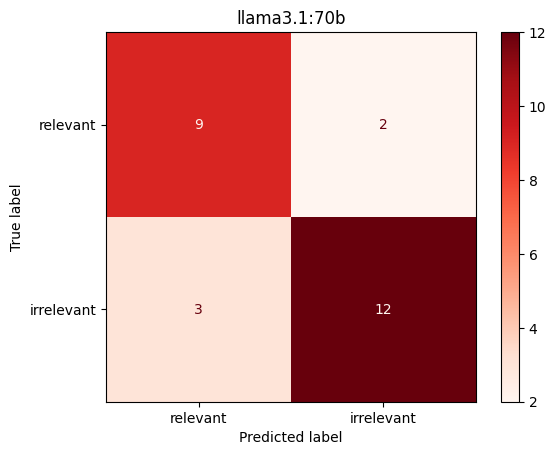

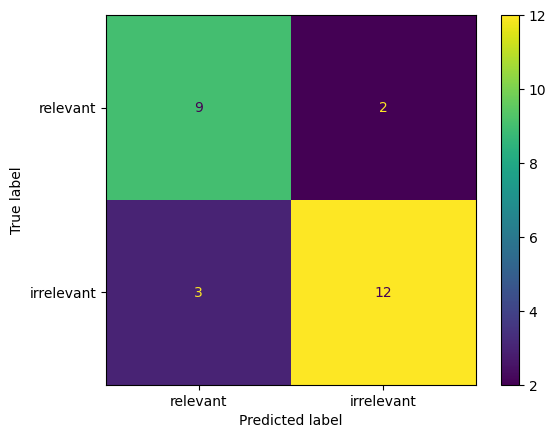

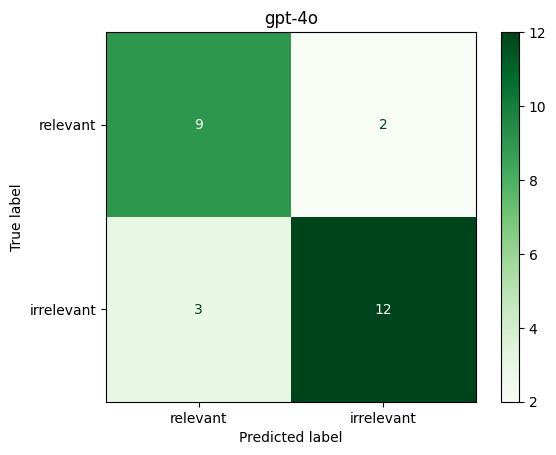

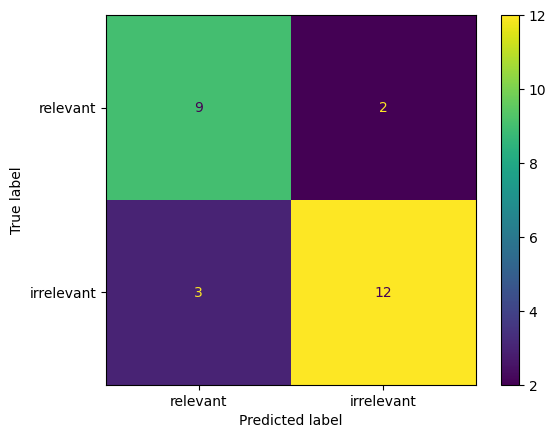

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_predictions(y_true = y_true, y_pred = y_pred, display_labels=['relevant', 'irrelevant'], cmap=plt.cm.Reds)
disp.ax_.set_title("llama3.1:70b")
disp.plot()
plt.show()

disp2 = ConfusionMatrixDisplay.from_predictions(y_true = y_true, y_pred = y_pred_openai, display_labels=['relevant', 'irrelevant'], cmap=plt.cm.Greens)
disp2.ax_.set_title("gpt-4o")
disp2.plot()
plt.show()

## Listing model properties

In [ ]:
show_path = "http://oceanus.cs.unlv.edu:11434/api/show"
# show_path = "http://127.0.0.1:11434/api/show"

models = ["ADBMO-filterer:latest","llama3.2:1b", "llama3.2:3b","llama3.2:3b-instruct-q2_K","llama3.2:3b-text-q2_K","phi3.5:3.8b", "llama3.1:70b", "medllama2:7b", "mistral:7b"]
import requests
response = requests.post(show_path, json = {"model": models[0]}).json()
print(response['modelfile'])